In [27]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [28]:
number = 1171

In [29]:
df = pd.read_csv('output.csv', index_col=0)

df['time'] = pd.to_timedelta(df['time'])
df['time_seconds'] = df['time'].dt.total_seconds()

df

,number,sex,time,time_seconds
place,,,,
1,11,M,0 days 01:00:50,3650.0
2,4,M,0 days 01:01:22,3682.0
3,2,M,0 days 01:01:24,3684.0
4,9,M,0 days 01:02:15,3735.0
5,5,M,0 days 01:02:19,3739.0
...,...,...,...,...
7322,8579,W,0 days 03:13:59,11639.0
7323,4191,M,0 days 03:16:56,11816.0
7324,2492,M,0 days 03:18:03,11883.0


In [30]:
N_total = len(df['number'].unique())
print(f'{N_total} participants')

N_male = df[df['sex'] == 'M'].shape[0]
print(f'{round(N_male/N_total*100)} % male')

hours, remainder = divmod(df['time_seconds'].median(), 3600)
minutes, seconds = divmod(remainder, 60)
print(f"median time: {hours} hours, {minutes} minutes, {seconds} seconds")

7319 participants
60 % male
median time: 1.0 hours, 57.0 minutes, 57.0 seconds


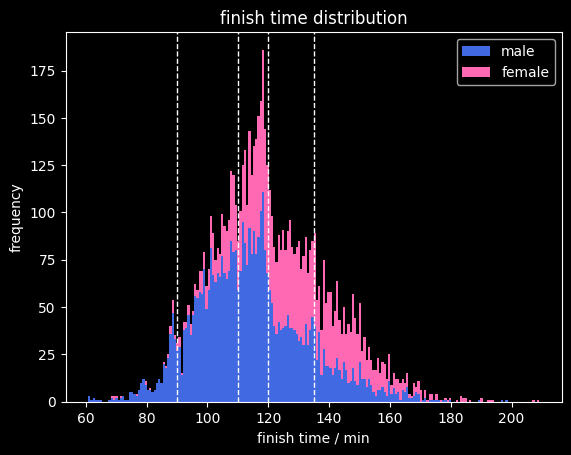

In [31]:
plt.hist([
    df.loc[df['sex'] == 'M' , 'time_seconds']/60 , 
    df.loc[df['sex'] == 'W' , 'time_seconds']/60], 
    label=['male','female'],
    color=['royalblue', 'hotpink'],
    bins=200, stacked=True)
# plt.axvline(df.loc[df['number'] == number, 'time_seconds'].iloc[0]/60, color='r', linestyle='dashed', linewidth=1, label=number)
plt.axvline(60 + 30,   color='w', linestyle='dashed', linewidth=1)
plt.axvline(60 + 50,   color='w', linestyle='dashed', linewidth=1)
plt.axvline(2*60,      color='w', linestyle='dashed', linewidth=1)
plt.axvline(2*60 + 15, color='w', linestyle='dashed', linewidth=1)
# plt.axvline(df['time_seconds'].median()/60, color='w', linewidth=1, label='median')
plt.xlabel('finish time / min')
plt.ylabel('frequency')
plt.title('finish time distribution')
plt.legend()

# plt.savefig('finish_time_distribution.png', dpi=300, transparent=True)

In [ ]:
df_male = df[df['sex'] == 'M']
df_male.reset_index(drop=True, inplace=True)

position_male = df_male[df_male['number'] == number].index[0] + 1

print(f'{position_male}. of {N_male} males ({position_male/N_male*100:.2f} %)')

2254. of 4382 males (51.44 %)
